In [958]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [959]:
df = pd.read_csv("nfldata.csv",header=0)

In [960]:
df.head()

,Unnamed: 0,Rk,Player,Team,Pos,Att,Att/G,Yds,Avg,Yds/G,TD,Lng,1st,1st%,20+,40+,FUM,Rec
0,0,1,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16,74T,73,24.1,9,3,5,NaN
1,1,2,Nick Chubb,CLE,RB,298.0,18.6,"1,494",5.0,93.4,8,88T,62,20.8,11,4,2,NaN
2,2,3,Josh Jacobs,OAK,RB,242.0,18.6,"1,150",4.8,88.5,7,51,53,21.9,8,2,1,NaN
3,3,4,Christian McCaffrey,CAR,RB,287.0,17.9,"1,387",4.8,86.7,15,84T,56,19.5,6,4,1,NaN
4,4,5,Ezekiel Elliott,DAL,RB,301.0,18.8,"1,357",4.5,84.8,12,33T,78,25.9,4,0,3,NaN


In [961]:
df.isnull().sum()

Unnamed: 0      0
Rk              0
Player          0
Team            0
Pos             0
Att           495
Att/G         495
Yds             0
Avg             0
Yds/G           0
TD              0
Lng             0
1st             0
1st%            0
20+             0
40+             0
FUM             0
Rec           330
dtype: int64

In [962]:
df.Player.value_counts()

T.J. Yeldon        3
Vyncint Smith      3
Frank Gore         3
Parris Campbell    3
C.J. Ham           3
                  ..
Will Grier         1
Jacob Hollister    1
Krishawn Hogan     1
Deontay Burnett    1
Brett Hundley      1
Name: Player, Length: 567, dtype: int64

In [963]:
df.loc[df["Player"] == "Frank Gore"]

,Unnamed: 0,Rk,Player,Team,Pos,Att,Att/G,Yds,Avg,Yds/G,TD,Lng,1st,1st%,20+,40+,FUM,Rec
40,40,41,Frank Gore,BUF,RB,166.0,10.4,599,3.6,37.4,2,41,30,18.1,4,1,0,NaN
522,42,240,Frank Gore,BUF,RB,NaN,NaN,100,7.7,6.2,0,18,5,38.5,0,0,0,13.0
572,42,240,Frank Gore,BUF,RB,NaN,NaN,100,7.7,6.2,0,18,5,38.5,0,0,0,13.0


want to drop column unnamed:0 it wasn't a part of the original data that was scrape

In [964]:
df = df.drop("Unnamed: 0",axis=1)

want nans to be 0

Because I scraped the data from the rushing and receiving categories I have players that are repeated to represent the respective categories I need to try and merge this so I can unique values 

In [965]:
df.loc[df["Player"] == "Christian McCaffrey"]

,Rk,Player,Team,Pos,Att,Att/G,Yds,Avg,Yds/G,TD,Lng,1st,1st%,20+,40+,FUM,Rec
3,4,Christian McCaffrey,CAR,RB,287.0,17.9,"1,387",4.8,86.7,15,84T,56,19.5,6,4,1,NaN
331,2,Christian McCaffrey,CAR,RB,NaN,NaN,"1,005",8.7,62.8,4,28,58,50.0,7,0,0,116.0


In [966]:
rec = df.loc[df["Att"].isnull()] # receving data set
rec

,Rk,Player,Team,Pos,Att,Att/G,Yds,Avg,Yds/G,TD,Lng,1st,1st%,20+,40+,FUM,Rec
330,1,Michael Thomas,NO,WR,NaN,NaN,"1,725",11.6,107.8,9,49,91,61.1,17,3,1,149.0
331,2,Christian McCaffrey,CAR,RB,NaN,NaN,"1,005",8.7,62.8,4,28,58,50.0,7,0,0,116.0
332,3,Keenan Allen,LAC,WR,NaN,NaN,"1,199",11.5,74.9,6,45,63,60.6,15,1,0,104.0
333,3,DeAndre Hopkins,HOU,WR,NaN,NaN,"1,165",11.2,77.7,7,43T,68,65.4,16,1,0,104.0
334,5,Julian Edelman,NE,WR,NaN,NaN,"1,117",11.2,69.8,6,44,54,54.0,13,1,3,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,478,Jamize Olawale,DAL,RB,NaN,NaN,0,--,0.0,0,--,0,--,0,0,0,0.0
821,478,Jace Sternberger,GB,TE,NaN,NaN,0,--,0.0,0,--,0,--,0,0,0,0.0
822,478,Tyrod Taylor,LAC,QB,NaN,NaN,0,--,0.0,0,--,0,--,0,0,0,0.0
823,478,Taywan Taylor,CLE,WR,NaN,NaN,0,--,0.0,0,--,0,--,0,0,0,0.0


In [967]:
rush = df.loc[df["Rec"].isnull()] # rushing data set
rush

,Rk,Player,Team,Pos,Att,Att/G,Yds,Avg,Yds/G,TD,Lng,1st,1st%,20+,40+,FUM,Rec
0,1,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16,74T,73,24.1,9,3,5,NaN
1,2,Nick Chubb,CLE,RB,298.0,18.6,"1,494",5.0,93.4,8,88T,62,20.8,11,4,2,NaN
2,3,Josh Jacobs,OAK,RB,242.0,18.6,"1,150",4.8,88.5,7,51,53,21.9,8,2,1,NaN
3,4,Christian McCaffrey,CAR,RB,287.0,17.9,"1,387",4.8,86.7,15,84T,56,19.5,6,4,1,NaN
4,5,Ezekiel Elliott,DAL,RB,301.0,18.8,"1,357",4.5,84.8,12,33T,78,25.9,4,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,326,Sean Mannion,MIN,QB,6.0,2.0,-5,-0.8,-1.7,0,0,0,0.0,0,0,1,NaN
326,327,Matt Barkley,BUF,QB,2.0,1.0,-4,-2.0,-2.0,0,0,0,0.0,0,0,1,NaN
327,328,Tim Boyle,GB,QB,5.0,1.7,-7,-1.4,-2.3,0,0,0,0.0,0,0,0,NaN
328,329,Blake Bortles,LA,QB,2.0,0.7,-9,-4.5,-3.0,0,1,0,0.0,0,0,0,NaN


Im going to mark rushing stats with r_ and drop rec column
and receiving stats with w_ and drop att,Att/G

In [969]:

rush = rush.rename(columns={"Yds":"r_Yds","TD":"r_TD",
                            "Avg":"r_Avg","Lng":"r_Lng",
                            "1st":"r_1st","1st%":"r_1st%",
                           "20+":"r_20+","40+":"r_40+","Rk":"r_Rk","FUM":"r_FUM"})
rush.drop("Rec",axis=1,inplace=True)
rush.head(20)

,r_Rk,Player,Team,Pos,Att,Att/G,r_Yds,r_Avg,Yds/G,r_TD,r_Lng,r_1st,r_1st%,r_20+,r_40+,r_FUM
0,1,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16,74T,73,24.1,9,3,5
1,2,Nick Chubb,CLE,RB,298.0,18.6,"1,494",5.0,93.4,8,88T,62,20.8,11,4,2
2,3,Josh Jacobs,OAK,RB,242.0,18.6,"1,150",4.8,88.5,7,51,53,21.9,8,2,1
3,4,Christian McCaffrey,CAR,RB,287.0,17.9,"1,387",4.8,86.7,15,84T,56,19.5,6,4,1
4,5,Ezekiel Elliott,DAL,RB,301.0,18.8,"1,357",4.5,84.8,12,33T,78,25.9,4,0,3
5,6,Chris Carson,SEA,RB,278.0,18.5,"1,230",4.4,82.0,7,59,75,27.0,8,1,6
6,7,Dalvin Cook,MIN,RB,250.0,17.9,"1,135",4.5,81.1,13,75T,60,24.0,7,2,3
7,8,Lamar Jackson,BAL,QB,176.0,11.7,"1,206",6.9,80.4,7,47T,71,40.3,11,1,8
8,9,Kenyan Drake,ARI,RB,123.0,15.4,643,5.2,80.4,8,80T,42,34.1,4,1,0
9,10,Marlon Mack,IND,RB,247.0,17.6,"1,091",4.4,77.9,8,63T,67,27.1,9,1,0


In [970]:
rec = rec.rename(columns={"Yds":"w_Yds","TD":"w_TD",
                            "Avg":"w_Avg","Lng":"w_Lng",
                            "1st":"w_1st","1st%":"w_1st%",
                           "20+":"w_20+","40+":"w_40+","Rk":"w_Rk","FUM":"w_FUM"})
rec.drop(["Att","Att/G"],axis=1,inplace=True)

In [971]:
rush.dtypes

r_Rk        int64
Player     object
Team       object
Pos        object
Att       float64
Att/G     float64
r_Yds      object
r_Avg      object
Yds/G     float64
r_TD        int64
r_Lng      object
r_1st       int64
r_1st%     object
r_20+       int64
r_40+       int64
r_FUM       int64
dtype: object

In [972]:
m_df = rush.merge(rec,on="Player",how="outer")
m_df

,r_Rk,Player,Team_x,Pos_x,Att,Att/G,r_Yds,r_Avg,Yds/G_x,r_TD,...,w_Avg,Yds/G_y,w_TD,w_Lng,w_1st,w_1st%,w_20+,w_40+,w_FUM,Rec
0,1.0,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16.0,...,11.4,13.7,2.0,75T,4.0,22.2,2.0,1.0,0.0,18.0
1,1.0,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16.0,...,11.4,13.7,2.0,75T,4.0,22.2,2.0,1.0,0.0,18.0
2,2.0,Nick Chubb,CLE,RB,298.0,18.6,"1,494",5.0,93.4,8.0,...,7.7,17.4,0.0,32,13.0,36.1,4.0,0.0,1.0,36.0
3,3.0,Josh Jacobs,OAK,RB,242.0,18.6,"1,150",4.8,88.5,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Christian McCaffrey,CAR,RB,287.0,17.9,"1,387",4.8,86.7,15.0,...,8.7,62.8,4.0,28,58.0,50.0,7.0,0.0,0.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,NaN,David Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,--,0.0,0.0,--,0.0,--,0.0,0.0,0.0,0.0
613,NaN,Jamize Olawale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,--,0.0,0.0,--,0.0,--,0.0,0.0,0.0,0.0
614,NaN,Jace Sternberger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,--,0.0,0.0,--,0.0,--,0.0,0.0,0.0,0.0
615,NaN,Taywan Taylor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,--,0.0,0.0,--,0.0,--,0.0,0.0,0.0,0.0


In [973]:
m_df.columns

Index(['r_Rk', 'Player', 'Team_x', 'Pos_x', 'Att', 'Att/G', 'r_Yds', 'r_Avg',
       'Yds/G_x', 'r_TD', 'r_Lng', 'r_1st', 'r_1st%', 'r_20+', 'r_40+',
       'r_FUM', 'w_Rk', 'Team_y', 'Pos_y', 'w_Yds', 'w_Avg', 'Yds/G_y', 'w_TD',
       'w_Lng', 'w_1st', 'w_1st%', 'w_20+', 'w_40+', 'w_FUM', 'Rec'],
      dtype='object')

In [974]:
m_df.loc[m_df["Player"] == "Jamize Olawale"].Team_y

613    DAL
Name: Team_y, dtype: object

Need to drop duplicates

In [975]:
m_df.loc[m_df["Player"] == "Derrick Henry"]

,r_Rk,Player,Team_x,Pos_x,Att,Att/G,r_Yds,r_Avg,Yds/G_x,r_TD,...,w_Avg,Yds/G_y,w_TD,w_Lng,w_1st,w_1st%,w_20+,w_40+,w_FUM,Rec
0,1.0,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16.0,...,11.4,13.7,2.0,75T,4.0,22.2,2.0,1.0,0.0,18.0
1,1.0,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16.0,...,11.4,13.7,2.0,75T,4.0,22.2,2.0,1.0,0.0,18.0


In [976]:
m_df.loc[m_df["Player"] == "Frank Gore"]

,r_Rk,Player,Team_x,Pos_x,Att,Att/G,r_Yds,r_Avg,Yds/G_x,r_TD,...,w_Avg,Yds/G_y,w_TD,w_Lng,w_1st,w_1st%,w_20+,w_40+,w_FUM,Rec
44,41.0,Frank Gore,BUF,RB,166.0,10.4,599,3.6,37.4,2.0,...,7.7,6.2,0.0,18,5.0,38.5,0.0,0.0,0.0,13.0
45,41.0,Frank Gore,BUF,RB,166.0,10.4,599,3.6,37.4,2.0,...,7.7,6.2,0.0,18,5.0,38.5,0.0,0.0,0.0,13.0


In [977]:
m_df.drop_duplicates(inplace=True)

In [978]:
m_df

,r_Rk,Player,Team_x,Pos_x,Att,Att/G,r_Yds,r_Avg,Yds/G_x,r_TD,...,w_Avg,Yds/G_y,w_TD,w_Lng,w_1st,w_1st%,w_20+,w_40+,w_FUM,Rec
0,1.0,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16.0,...,11.4,13.7,2.0,75T,4.0,22.2,2.0,1.0,0.0,18.0
2,2.0,Nick Chubb,CLE,RB,298.0,18.6,"1,494",5.0,93.4,8.0,...,7.7,17.4,0.0,32,13.0,36.1,4.0,0.0,1.0,36.0
3,3.0,Josh Jacobs,OAK,RB,242.0,18.6,"1,150",4.8,88.5,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Christian McCaffrey,CAR,RB,287.0,17.9,"1,387",4.8,86.7,15.0,...,8.7,62.8,4.0,28,58.0,50.0,7.0,0.0,0.0,116.0
5,5.0,Ezekiel Elliott,DAL,RB,301.0,18.8,"1,357",4.5,84.8,12.0,...,7.8,26.2,2.0,27,21.0,38.9,3.0,0.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,NaN,David Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,--,0.0,0.0,--,0.0,--,0.0,0.0,0.0,0.0
613,NaN,Jamize Olawale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,--,0.0,0.0,--,0.0,--,0.0,0.0,0.0,0.0
614,NaN,Jace Sternberger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,--,0.0,0.0,--,0.0,--,0.0,0.0,0.0,0.0
615,NaN,Taywan Taylor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,--,0.0,0.0,--,0.0,--,0.0,0.0,0.0,0.0


In [979]:
m_df.loc[m_df["Player"]=="Frank Gore"]

,r_Rk,Player,Team_x,Pos_x,Att,Att/G,r_Yds,r_Avg,Yds/G_x,r_TD,...,w_Avg,Yds/G_y,w_TD,w_Lng,w_1st,w_1st%,w_20+,w_40+,w_FUM,Rec
44,41.0,Frank Gore,BUF,RB,166.0,10.4,599,3.6,37.4,2.0,...,7.7,6.2,0.0,18,5.0,38.5,0.0,0.0,0.0,13.0


In [980]:
m_df.loc[m_df["Player"] == "Michael Thomas"]

,r_Rk,Player,Team_x,Pos_x,Att,Att/G,r_Yds,r_Avg,Yds/G_x,r_TD,...,w_Avg,Yds/G_y,w_TD,w_Lng,w_1st,w_1st%,w_20+,w_40+,w_FUM,Rec
341,319.0,Michael Thomas,NO,WR,1.0,0.1,-9,-9.0,-0.6,0.0,...,11.6,107.8,9.0,49,91.0,61.1,17.0,3.0,1.0,149.0


In [981]:
m_df.head(20)

,r_Rk,Player,Team_x,Pos_x,Att,Att/G,r_Yds,r_Avg,Yds/G_x,r_TD,...,w_Avg,Yds/G_y,w_TD,w_Lng,w_1st,w_1st%,w_20+,w_40+,w_FUM,Rec
0,1.0,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16.0,...,11.4,13.7,2.0,75T,4.0,22.2,2.0,1.0,0.0,18.0
2,2.0,Nick Chubb,CLE,RB,298.0,18.6,"1,494",5.0,93.4,8.0,...,7.7,17.4,0.0,32,13.0,36.1,4.0,0.0,1.0,36.0
3,3.0,Josh Jacobs,OAK,RB,242.0,18.6,"1,150",4.8,88.5,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Christian McCaffrey,CAR,RB,287.0,17.9,"1,387",4.8,86.7,15.0,...,8.7,62.8,4.0,28,58.0,50.0,7.0,0.0,0.0,116.0
5,5.0,Ezekiel Elliott,DAL,RB,301.0,18.8,"1,357",4.5,84.8,12.0,...,7.8,26.2,2.0,27,21.0,38.9,3.0,0.0,0.0,54.0
6,6.0,Chris Carson,SEA,RB,278.0,18.5,"1,230",4.4,82.0,7.0,...,7.2,17.7,2.0,21,10.0,27.0,2.0,0.0,1.0,37.0
7,7.0,Dalvin Cook,MIN,RB,250.0,17.9,"1,135",4.5,81.1,13.0,...,9.8,37.1,0.0,31,26.0,49.1,7.0,0.0,1.0,53.0
8,8.0,Lamar Jackson,BAL,QB,176.0,11.7,"1,206",6.9,80.4,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,Kenyan Drake,ARI,RB,123.0,15.4,643,5.2,80.4,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10.0,Marlon Mack,IND,RB,247.0,17.6,"1,091",4.4,77.9,8.0,...,5.9,5.9,0.0,14,2.0,14.3,0.0,0.0,0.0,14.0


Want to aggragate the columns are the same such as Team_x and Team_y

In [982]:
m_df['Team_x'] = m_df['Team_x'].fillna(value=m_df['Team_y'])
m_df['Pos_x'] = m_df['Pos_x'].fillna(value=m_df['Pos_y'])
m_df['Yds/G_x'] = m_df['Yds/G_x'].fillna(value=m_df['Yds/G_y'])

In [984]:
m_df['Team_y'].isnull().sum()

122

In [985]:
m_df.drop(['Team_y','Pos_y','Yds/G_y'],axis=1,inplace=True)

In [986]:
data = m_df.fillna(0)

In [987]:
data

,r_Rk,Player,Team_x,Pos_x,Att,Att/G,r_Yds,r_Avg,Yds/G_x,r_TD,...,w_Yds,w_Avg,w_TD,w_Lng,w_1st,w_1st%,w_20+,w_40+,w_FUM,Rec
0,1.0,Derrick Henry,TEN,RB,303.0,20.2,"1,540",5.1,102.7,16.0,...,206,11.4,2.0,75T,4.0,22.2,2.0,1.0,0.0,18.0
2,2.0,Nick Chubb,CLE,RB,298.0,18.6,"1,494",5.0,93.4,8.0,...,278,7.7,0.0,32,13.0,36.1,4.0,0.0,1.0,36.0
3,3.0,Josh Jacobs,OAK,RB,242.0,18.6,"1,150",4.8,88.5,7.0,...,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,4.0,Christian McCaffrey,CAR,RB,287.0,17.9,"1,387",4.8,86.7,15.0,...,"1,005",8.7,4.0,28,58.0,50.0,7.0,0.0,0.0,116.0
5,5.0,Ezekiel Elliott,DAL,RB,301.0,18.8,"1,357",4.5,84.8,12.0,...,420,7.8,2.0,27,21.0,38.9,3.0,0.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.0,David Long,LA,DB,0.0,0.0,0,0,0.0,0.0,...,0,--,0.0,--,0.0,--,0.0,0.0,0.0,0.0
613,0.0,Jamize Olawale,DAL,RB,0.0,0.0,0,0,0.0,0.0,...,0,--,0.0,--,0.0,--,0.0,0.0,0.0,0.0
614,0.0,Jace Sternberger,GB,TE,0.0,0.0,0,0,0.0,0.0,...,0,--,0.0,--,0.0,--,0.0,0.0,0.0,0.0
615,0.0,Taywan Taylor,CLE,WR,0.0,0.0,0,0,0.0,0.0,...,0,--,0.0,--,0.0,--,0.0,0.0,0.0,0.0


In [988]:
data = data.rename(columns=lambda x: x.replace(' ', '')[:-2].upper() if x.endswith("_x") else x)

In [989]:
data.columns

Index(['r_Rk', 'Player', 'TEAM', 'POS', 'Att', 'Att/G', 'r_Yds', 'r_Avg',
       'YDS/G', 'r_TD', 'r_Lng', 'r_1st', 'r_1st%', 'r_20+', 'r_40+', 'r_FUM',
       'w_Rk', 'w_Yds', 'w_Avg', 'w_TD', 'w_Lng', 'w_1st', 'w_1st%', 'w_20+',
       'w_40+', 'w_FUM', 'Rec'],
      dtype='object')

In [990]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 616
Data columns (total 27 columns):
r_Rk      567 non-null float64
Player    567 non-null object
TEAM      567 non-null object
POS       567 non-null object
Att       567 non-null float64
Att/G     567 non-null float64
r_Yds     567 non-null object
r_Avg     567 non-null object
YDS/G     567 non-null float64
r_TD      567 non-null float64
r_Lng     567 non-null object
r_1st     567 non-null float64
r_1st%    567 non-null object
r_20+     567 non-null float64
r_40+     567 non-null float64
r_FUM     567 non-null float64
w_Rk      567 non-null float64
w_Yds     567 non-null object
w_Avg     567 non-null object
w_TD      567 non-null float64
w_Lng     567 non-null object
w_1st     567 non-null float64
w_1st%    567 non-null object
w_20+     567 non-null float64
w_40+     567 non-null float64
w_FUM     567 non-null float64
Rec       567 non-null float64
dtypes: float64(16), object(11)
memory usage: 124.0+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227D2971DA0>,
      dtype=object)

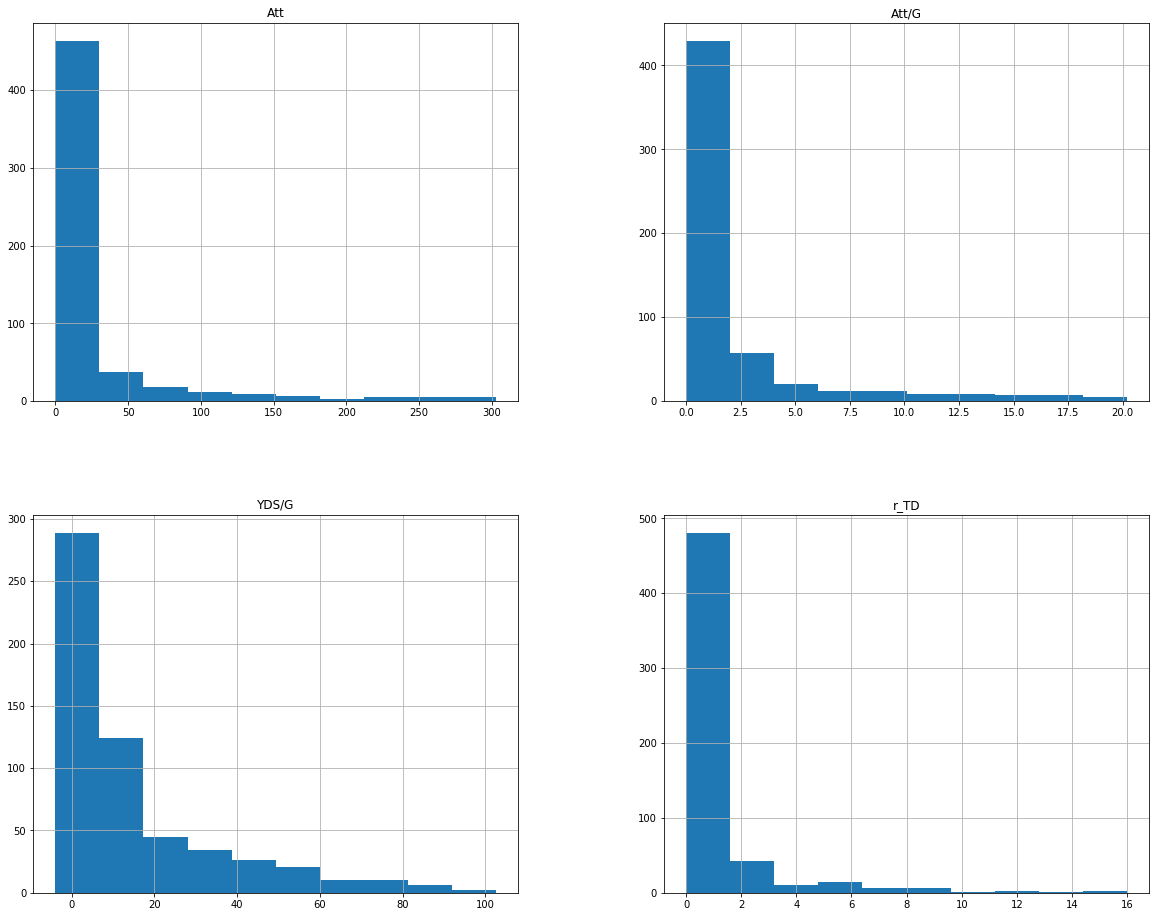

In [991]:
data[['Att','Att/G','r_Yds','YDS/G','r_TD']].hist(figsize=(20,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227D2F9D630>,
      dtype=object)

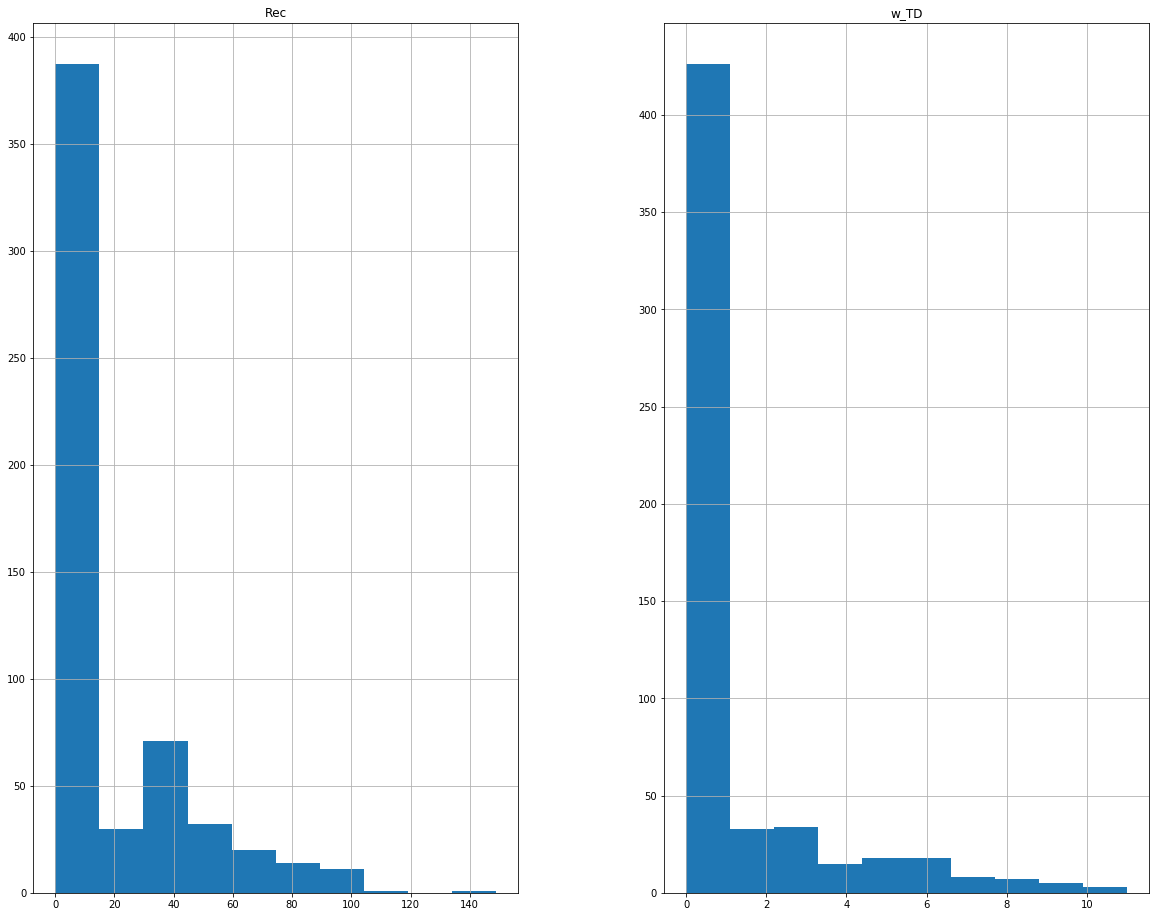

In [1003]:
data[['w_TD','Rec']].hist(figsize=(20,16))

In [999]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 616
Data columns (total 27 columns):
r_Rk      567 non-null float64
Player    567 non-null object
TEAM      567 non-null object
POS       567 non-null object
Att       567 non-null float64
Att/G     567 non-null float64
r_Yds     567 non-null object
r_Avg     567 non-null object
YDS/G     567 non-null float64
r_TD      567 non-null float64
r_Lng     567 non-null object
r_1st     567 non-null float64
r_1st%    567 non-null object
r_20+     567 non-null float64
r_40+     567 non-null float64
r_FUM     567 non-null float64
w_Rk      567 non-null float64
w_Yds     567 non-null object
w_Avg     567 non-null object
w_TD      567 non-null float64
w_Lng     567 non-null object
w_1st     567 non-null float64
w_1st%    567 non-null object
w_20+     567 non-null float64
w_40+     567 non-null float64
w_FUM     567 non-null float64
Rec       567 non-null float64
dtypes: float64(16), object(11)
memory usage: 124.0+ KB


In [1004]:
data.to_csv("cleaned_nfl_data.csv")